In [7]:
#Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [8]:
url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv'

In [9]:
ruterData = pd.read_csv(url, delimiter=';', index_col=0) 
print(ruterData.head(5))

                                       Dato  Fylke Område Kommune  \
TurId                                                               
15006-2020-08-10T10:24:00+02:00  10/08/2020  Viken   Vest   Bærum   
15002-2020-08-15T12:54:00+02:00  15/08/2020  Viken   Vest   Bærum   
15004-2020-08-03T09:54:00+02:00  03/08/2020  Viken   Vest   Bærum   
15003-2020-07-27T13:00:00+02:00  27/07/2020  Viken   Vest   Bærum   
15002-2020-08-27T07:15:00+02:00  27/08/2020  Viken   Vest   Bærum   

                                                Holdeplass_Fra  \
TurId                                                            
15006-2020-08-10T10:24:00+02:00                    Nordliveien   
15002-2020-08-15T12:54:00+02:00               Nadderud stadion   
15004-2020-08-03T09:54:00+02:00               Ringstabekkveien   
15003-2020-07-27T13:00:00+02:00                      Gruvemyra   
15002-2020-08-27T07:15:00+02:00  Lysaker stasjon (Plattform A)   

                                                     

In [10]:
ruterData.describe()

,Linjeretning,Kjøretøy_Kapasitet,Passasjerer_Ombord
count,6000.000000,6000.000000,6000.000000
mean,0.492000,104.712167,4.512833
std,0.499978,24.225196,6.735730
min,0.000000,33.000000,-39.000000
25%,0.000000,80.000000,0.000000
50%,0.000000,106.000000,3.000000
75%,1.000000,112.000000,7.000000
max,1.000000,151.000000,64.000000


In [13]:
#Alle stopp ved Stabekk skole
Rutestopp=ruterData[ruterData['Holdeplass_Til'] == 'Stabekk skole']
Rutestopp.head(10)

,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
TurId,,,,,,,,,,,,,,,,
15002-2020-08-13T18:09:00+02:00,13/08/2020,Viken,Vest,Bærum,Bekkestua bussterminal (Plattform C),Stabekk skole,Lokal,Viken,150,0,18:37:41,18:38:19,18:29:00,18:29:00,112,4
15001-2020-08-06T17:00:00+02:00,06/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Stabekk skole,Lokal,Viken,150,1,17:35:07,17:35:29,17:26:00,17:26:00,112,10
15014-2020-08-18T21:39:00+02:00,18/08/2020,Viken,Vest,Bærum,Bekkestua bussterminal (Plattform C),Stabekk skole,Lokal,Viken,150,0,21:58:59,22:03:21,21:59:00,21:59:00,112,2
15005-2020-08-03T14:39:00+02:00,03/08/2020,Viken,Vest,Bærum,Bekkestua bussterminal (Plattform C),Stabekk skole,Lokal,Viken,150,0,15:04:01,15:06:08,14:59:00,14:59:00,112,29
15010-2020-08-07T14:45:00+02:00,07/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Stabekk skole,Lokal,Viken,150,1,15:13:38,15:14:02,15:11:00,15:11:00,112,1
15014-2020-08-11T00:33:00+02:00,10/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Stabekk skole,Lokal,Viken,150,1,24:57:01,24:57:05,24:57:00,24:57:00,112,2
15005-2020-07-22T05:54:00+02:00,22/07/2020,Viken,Vest,Bærum,Bekkestua bussterminal (Plattform C),Stabekk skole,Lokal,Viken,150,0,06:13:41,06:17:34,06:14:00,06:14:00,112,6
15001-2020-08-13T14:34:00+02:00,13/08/2020,Viken,Vest,Bærum,Bekkestua bussterminal (Plattform C),Stabekk skole,Lokal,Viken,150,0,14:54:51,14:58:19,14:54:00,14:54:00,112,2
15002-2020-07-16T12:39:00+02:00,16/07/2020,Viken,Vest,Bærum,Bekkestua bussterminal (Plattform C),Stabekk skole,Lokal,Viken,150,0,13:00:57,13:02:35,12:59:00,12:59:00,112,10


In [14]:
Rutestopp=ruterData[ruterData['Holdeplass_Fra'] == 'Nordjordet']
Rutestopp.head(10)

,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
TurId,,,,,,,,,,,,,,,,
14012-2020-07-28T15:54:00+02:00,28/07/2020,Viken,Vest,Bærum,Nordjordet,Snaret,Lokal,Viken,140,1,16:10:05,16:10:09,16:07:00,16:07:00,130,2
14002-2020-07-31T19:02:00+02:00,31/07/2020,Viken,Vest,Bærum,Nordjordet,Stallkroa,Lokal,Viken,140,0,19:24:13,19:24:37,19:22:00,19:22:00,130,13
14018-2020-08-21T08:27:00+02:00,21/08/2020,Viken,Vest,Bærum,Nordjordet,Stallkroa,Lokal,Viken,140,0,08:49:32,08:49:37,08:47:00,08:47:00,130,-4
14002-2020-07-18T15:54:00+02:00,18/07/2020,Viken,Vest,Bærum,Nordjordet,Snaret,Lokal,Viken,140,1,16:08:22,16:08:28,16:07:00,16:07:00,130,2
14014-2020-07-23T14:47:00+02:00,23/07/2020,Viken,Vest,Bærum,Nordjordet,Stallkroa,Lokal,Viken,140,0,15:08:48,15:08:53,15:07:00,15:07:00,130,8
14009-2020-08-04T17:39:00+02:00,04/08/2020,Viken,Vest,Bærum,Nordjordet,Snaret,Lokal,Viken,140,1,17:53:31,17:53:51,17:52:00,17:52:00,130,3


In [15]:
Rutestopp=ruterData[ruterData['Holdeplass_Fra'] == 'Nordjordet']
(ruterData['Dato'] <= '21.07.2020')
Rutestopp.head()

,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
TurId,,,,,,,,,,,,,,,,
14012-2020-07-28T15:54:00+02:00,28/07/2020,Viken,Vest,Bærum,Nordjordet,Snaret,Lokal,Viken,140,1,16:10:05,16:10:09,16:07:00,16:07:00,130,2
14002-2020-07-31T19:02:00+02:00,31/07/2020,Viken,Vest,Bærum,Nordjordet,Stallkroa,Lokal,Viken,140,0,19:24:13,19:24:37,19:22:00,19:22:00,130,13
14018-2020-08-21T08:27:00+02:00,21/08/2020,Viken,Vest,Bærum,Nordjordet,Stallkroa,Lokal,Viken,140,0,08:49:32,08:49:37,08:47:00,08:47:00,130,-4
14002-2020-07-18T15:54:00+02:00,18/07/2020,Viken,Vest,Bærum,Nordjordet,Snaret,Lokal,Viken,140,1,16:08:22,16:08:28,16:07:00,16:07:00,130,2
14014-2020-07-23T14:47:00+02:00,23/07/2020,Viken,Vest,Bærum,Nordjordet,Stallkroa,Lokal,Viken,140,0,15:08:48,15:08:53,15:07:00,15:07:00,130,8


In [17]:
ruterData['date_time'] = pd.to_datetime(ruterData['Dato']) 

In [19]:
stopp= ruterData[(ruterData['Linjenavn'] == '140') &
                       (ruterData['date_time'] >='19/07/2020') &
                       (ruterData['date_time'] < '21/07/2020')]
stopp

,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,date_time
TurId,,,,,,,,,,,,,,,,,
14004-2020-07-20T11:09:00+02:00,20/07/2020,Viken,Vest,Bærum,Nadderudjordet,Hosleveien,Lokal,Viken,140,1,11:43:48,11:44:22,11:38:00,11:38:00,130,2,2020-07-20
14007-2020-07-19T21:39:00+02:00,19/07/2020,Viken,Vest,Bærum,Snaret,Eiksmarka T (mot Østerås),Lokal,Viken,140,1,21:54:00,21:54:13,21:53:00,21:53:00,130,1,2020-07-19
14007-2020-07-20T07:47:00+02:00,20/07/2020,Viken,Vest,Bærum,Østerås T,Østerås senter,Lokal,Viken,140,0,08:00:00,08:02:19,08:02:00,08:02:00,130,0,2020-07-20
14012-2020-07-20T15:54:00+02:00,20/07/2020,Viken,Vest,Bærum,Hans Burums vei,Nadderudhallen,Lokal,Viken,140,1,16:27:44,16:27:50,16:25:00,16:25:00,130,2,2020-07-20
14005-2020-07-20T10:47:00+02:00,20/07/2020,Viken,Vest,Bærum,Lindebergveien,Bjerkelundsveien(i Vollsveien),Lokal,Viken,140,0,11:11:52,11:12:18,11:10:00,11:10:00,130,5,2020-07-20


In [22]:
Linje_gropup=ruterData.groupby(['Linjenavn'])
Linje_gropup

In [23]:
Linje_gropup['Passasjerer_Ombord'].sum()


Linjenavn
100     3442
110     2139
110E      95
115E      52
120      521
        ... 
5N         4
60       525
67         4
74       203
91       174
Name: Passasjerer_Ombord, Length: 150, dtype: int64

In [26]:
Tur= ruterData[(ruterData['Holdeplass_Til'] == 'Nordjordet') &
                       (ruterData['Dato'] <='31/08/20') &
                       (ruterData['Dato'] > '21/08/2020')]
Tur
Station_Totals = pd.DataFrame(Linje_gropup['Passasjerer_Ombord'].sum())
Station_Totals.sort_values(ascending=False,by='Passasjerer_Ombord',inplace=True)
Station_Totals

,Passasjerer_Ombord
Linjenavn,
100,3442
110,2139
390,1764
380,1300
250,1253
...,...
3676,-9
145,-13
41,-15


<AxesSubplot:xlabel='Linjenavn'>

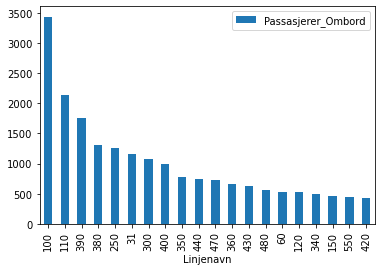

In [27]:
Station_Totals.head(20).plot(kind='bar',rot=90) 

In [32]:
Uketur= ruterData[(ruterData['Kommune'] == 'Bærum') &
                       (ruterData['date_time'] >='20/08/2020') &
                       (ruterData['date_time'] < '17/08/2020')]
Uketur

,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,date_time
TurId,,,,,,,,,,,,,,,,,


In [33]:
Uketur= ruterData[(ruterData['Holdeplass_Fra'] == 'Nordliveien') & (ruterData['Holdeplass_Til'] == 'Tjernsmyr') & 
                       (ruterData['date_time'] >='01/06/2020') &
                       (ruterData['date_time'] < '11/08/2020') & (ruterData['Passasjerer_Ombord'] > 0)]
Uketur

,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,date_time
TurId,,,,,,,,,,,,,,,,,
15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5,2020-10-08


<AxesSubplot:xlabel='Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'>

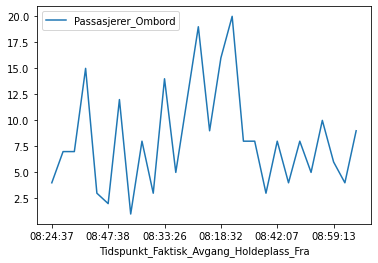

In [34]:
Turer= ruterData[(ruterData['Linjenavn'] == '100') & (ruterData['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] <= '09:00:00') & 
           (ruterData['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] > '08:00:00')  & (ruterData['Passasjerer_Ombord'] > 0)]
                 
Turer
Turer.plot(x ='Tidspunkt_Faktisk_Avgang_Holdeplass_Fra', y='Passasjerer_Ombord')

<AxesSubplot:title={'center':'Bordings in the rush hour. Date 20.08.20  '}, xlabel='Passasjerer_Ombord', ylabel='Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'>

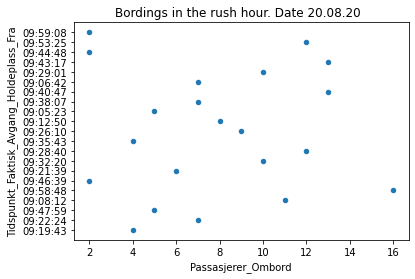

In [38]:
TurerDato= ruterData[(ruterData['Linjenavn'] == '100') & (ruterData['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] <= '10:00:00') & 
(ruterData['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] > '09:00:00')  & (ruterData['Passasjerer_Ombord'] > 0)& 
(ruterData['date_time'] < '20/08/2020')]
TurerDato.plot.scatter(x='Passasjerer_Ombord', y='Tidspunkt_Faktisk_Avgang_Holdeplass_Fra', title='Bordings in the rush hour. Date 20.08.20  ')

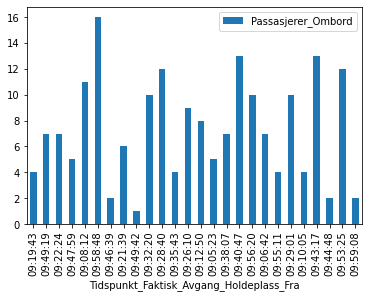

In [39]:
senavgang= ruterData[(ruterData['Linjenavn'] == '100') & 
            (ruterData['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] <= '10:00:00') & 
            (ruterData['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] > '09:00:00')  &
            (ruterData['Passasjerer_Ombord'] > 0)&
            (ruterData['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra']<= '10:00:00') &
            (ruterData['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'] > '09:00:00')
           ]
senavgang

      
   
senavgang.plot(kind='bar', y=['Linjenavn','Passasjerer_Ombord'], x='Tidspunkt_Faktisk_Avgang_Holdeplass_Fra')

plt.show()

In [47]:
line_capacity = ruterData[['Linjenavn', 'Kjøretøy_Kapasitet']]
line_capacity.groupby('Linjenavn')['Kjøretøy_Kapasitet'].unique()


Linjenavn
100             [151]
110             [106]
110E       [115, 112]
115E            [115]
120     [72, 76, 115]
            ...      
5N              [151]
60           [33, 77]
67               [33]
74               [72]
91              [106]
Name: Kjøretøy_Kapasitet, Length: 150, dtype: object

<AxesSubplot:title={'center':'Buskapasietet'}, xlabel='Kjøretøy_Kapasitet', ylabel='Linjenavn'>

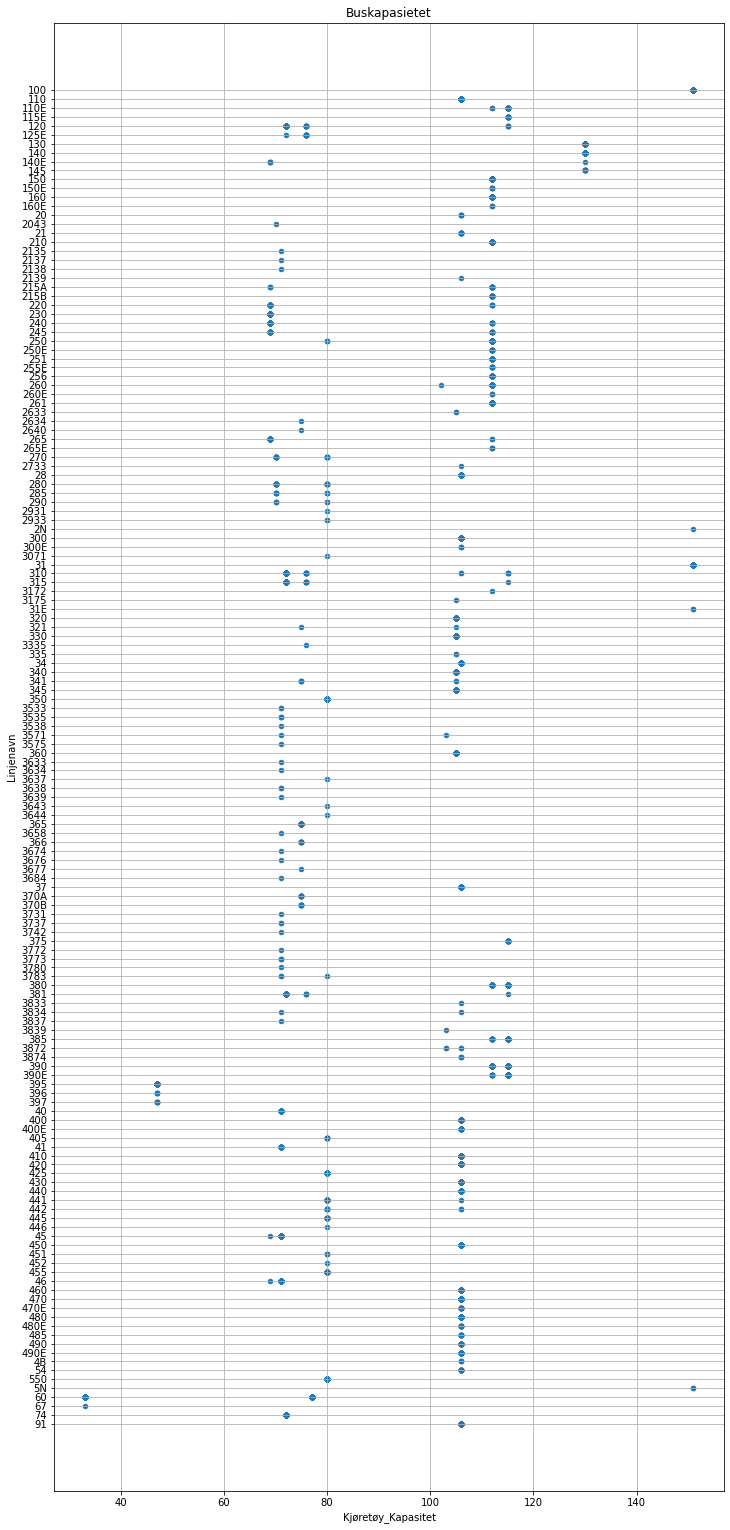

In [52]:
line_capacity.sort_values(by = 'Linjenavn', ascending = False).plot.scatter(figsize = (12,27), x='Kjøretøy_Kapasitet', y='Linjenavn', title='Buskapasietet', grid = True)